In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [65]:
data = pd.read_csv('accepted_2007_to_2018_100T.csv' )

C:\Users\hannan\anaconda3\envs\mlProject\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [66]:
# Cutting the data in half to avoid out-of-memory issues

data = data.sample(frac=0.5, axis=0, random_state=42).reset_index(drop=True)

In [67]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;
0,64969592,NaN,35000.0,35000.0,35000.0,60 months,13.67,808.42,C,C4,VP - Senior Specialist Developer,< 1 year,MORTGAGE,127000.0,Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,130xx,NY,16.33,0.0,Dec-1996,665.0,669.0,1.0,36.0,NaN,15.0,0.0,35684.0,85.0,27.0,w,0.00,0.00,38293.270000,38293.27,35000.00,3293.27,0.0,0.00,0.0000,Jul-2016,32660.91,NaN,Sep-2018,649.0,645.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,158953.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,NaN,NaN,NaN,4.0,11353.0,4533.0,92.0,0.0,0.0,227.0,199.0,19.0,11.0,2.0,19.0,NaN,2.0,36.0,0.0,6.0,8.0,10.0,10.0,10.0,8.0,15.0,10.0,14.0,NaN,0.0,0.0,1.0,96.0,83.3,0.0,0.0,176331.0,68003.0,27200.0,35131.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
1,65313713,NaN,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,B4,waiter/manager,9 years,RENT,45000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,900xx,CA,19.09,1.0,Dec-2000,690.0,694.0,0.0,13.0,NaN,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,Apr-2017,6332.01,NaN,Mar-2019,749.0,745.0,0.0,13.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,19893.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15100.0,NaN,NaN,NaN,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,NaN,10.0,NaN,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100

In [68]:
data.isna().mean().sort_values()

id                                            0.000000
num_tl_90g_dpd_24m                            0.008920
application_type                              0.008920
policy_code                                   0.008920
num_tl_op_past_12m                            0.008920
collections_12_mths_ex_med                    0.008920
last_fico_range_low                           0.008920
last_fico_range_high                          0.008920
num_tl_30dpd                                  0.008920
pct_tl_nvr_dlq                                0.008920
pub_rec_bankruptcies                          0.008920
collection_recovery_fee                       0.008920
recoveries                                    0.008920
total_rec_late_fee                            0.008920
total_rec_int                                 0.008920
total_rec_prncp                               0.008920
total_pymnt_inv                               0.008920
last_pymnt_amnt                               0.008920
avg_cur_ba

In [69]:
data = data.drop(data.loc[:, data.isna().mean().sort_values() > 0.3].columns, axis=1)

In [70]:
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,64969592,35000.0,35000.0,35000.0,60 months,13.67,808.42,C,C4,VP - Senior Specialist Developer,< 1 year,MORTGAGE,127000.0,Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,130xx,NY,16.33,0.0,Dec-1996,665.0,669.0,1.0,15.0,0.0,35684.0,85.0,27.0,w,0.00,0.00,38293.270000,38293.27,35000.00,3293.27,0.0,0.00,0.0000,Jul-2016,32660.91,Sep-2018,649.0,645.0,0.0,1.0,Individual,0.0,0.0,158953.0,42000.0,4.0,11353.0,4533.0,92.0,0.0,0.0,227.0,199.0,19.0,11.0,2.0,19.0,2.0,0.0,6.0,8.0,10.0,10.0,10.0,8.0,15.0,10.0,14.0,NaN,0.0,0.0,1.0,96.0,83.3,0.0,0.0,176331.0,68003.0,27200.0,35131.0,N,Cash,N,;
1,65313713,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,B4,waiter/manager,9 years,RENT,45000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,900xx,CA,19.09,1.0,Dec-2000,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,Apr-2017,6332.01,Mar-2019,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,;
2,68424819,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,B3,Social Worker,10+ years,OWN,70000.0,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,480xx,MI,24.29,0.0,Feb-2000,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,Jul-2018,3981.16,Jul-2018,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,;
3,67735877,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,C1,Head of Human Resources,10+ years,OWN,130000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,086xx,NJ,4.86,1.0,Mar-1993,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,Dec-2018,199.14,Dec-2018,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,N,Cash,N,;
4,65885782,13675.0,13675.0,13625.0,60 months,18.49,350.92,E,E2,Preschool Director,5 years,MORTGAGE,28000.0,Verified,D

In [71]:
data = data.dropna(axis=0).reset_index(drop=True)

In [72]:
data.isna().sum().sum()

0

In [73]:
data

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,65313713,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,B4,waiter/manager,9 years,RENT,45000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,900xx,CA,19.09,1.0,Dec-2000,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,Apr-2017,6332.01,Mar-2019,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,;
1,68424819,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,B3,Social Worker,10+ years,OWN,70000.0,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,480xx,MI,24.29,0.0,Feb-2000,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,Jul-2018,3981.16,Jul-2018,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,;
2,67735877,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,C1,Head of Human Resources,10+ years,OWN,130000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,086xx,NJ,4.86,1.0,Mar-1993,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,Dec-2018,199.14,Dec-2018,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,N,Cash,N,;
3,65885782,13675.0,13675.0,13625.0,60 months,18.49,350.92,E,E2,Preschool Director,5 years,MORTGAGE,28000.0,Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,337xx,FL,32.45,0.0,Jan-1999,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,f,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,Dec-2016,350.92,Mar-2019,569.0,565.0,0.0,1.0,Individual,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,N,Cash,N,;
4,62619394,30000.0,30000.0,30000.0,60 months,9.99,637.27,B,B3,Manufacturers Representative,2 years,MORTGAGE,125000.0,Source Verified,Oct-2015,Cu

In [74]:
unneeded_columns = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code','settlement_term;']

In [75]:
{column: list(data[column].unique()) for column in data.drop(unneeded_columns, axis=1).columns if data.dtypes[column] == 'object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['B', 'C', 'E', 'F', 'D', 'A', 'G'],
 'emp_length': ['9 years',
  '10+ years',
  '5 years',
  '2 years',
  '3 years',
  '1 year',
  '4 years',
  '< 1 year',
  '7 years',
  '8 years',
  '6 years'],
 'home_ownership': ['RENT', 'OWN', 'MORTGAGE', 'ANY'],
 'verification_status': ['Source Verified', 'Verified', 'Not Verified'],
 'issue_d': ['Dec-2015', 'Oct-2015', 'Nov-2015'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Current',
  'Late (31-120 days)',
  'In Grace Period',
  'Late (16-30 days)'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'car',
  'home_improvement',
  'medical',
  'other',
  'house',
  'major_purchase',
  'moving',
  'vacation',
  'small_business',
  'renewable_energy'],
 'addr_state': ['CA',
  'MI',
  'NJ',
  'FL',
  'NC',
  'VA',
  'WA',
  'OH',
  'OK',
  'CO',
  'NY',
  'TN',
  'GA',
  'CT',
  'IL',
  'OR',
  'LA',
  'NE',
  'NV',
  'AZ',
  'MD',
  'IN',
  'PA',
  'TX',
  'WI'

In [76]:
data = data.drop(unneeded_columns, axis=1)

In [77]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

In [78]:
data['issue_d']

0        Dec-2015
1        Dec-2015
2        Dec-2015
3        Dec-2015
4        Oct-2015
           ...   
37748    Oct-2015
37749    Nov-2015
37750    Nov-2015
37751    Dec-2015
37752    Oct-2015
Name: issue_d, Length: 37753, dtype: object

In [79]:
data.loc[0, 'issue_d'][0:3]

'Dec'

In [80]:
data.loc[0, 'issue_d'][-4:]

'2015'

In [81]:
for column in date_columns:
    data[column + '_month'] = data[column].apply(lambda x: x[0:3])
    data[column + '_year'] = data[column].apply(lambda x: x[-4:])

In [82]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,9 years,RENT,45000.0,Source Verified,Dec-2015,Fully Paid,n,debt_consolidation,CA,19.09,1.0,Dec-2000,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,Apr-2017,6332.01,Mar-2019,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,Dec,2015,Dec,2000,Apr,2017,Mar,2019
1,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,10+ years,OWN,70000.0,Verified,Dec-2015,Fully Paid,n,debt_consolidation,MI,24.29,0.0,Feb-2000,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,Jul-2018,3981.16,Jul-2018,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,Dec,2015,Feb,2000,Jul,2018,Jul,2018
2,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,10+ years,OWN,130000.0,Source Verified,Dec-2015,Fully Paid,n,credit_card,NJ,4.86,1.0,Mar-1993,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,Dec-2018,199.14,Dec-2018,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,N,Cash,N,Dec,2015,Mar,1993,Dec,2018,Dec,2018
3,13675.0,13675.0,13625.0,60 months,18.49,350.92,E,5 years,MORTGAGE,28000.0,Verified,Dec-2015,Charged Off,n,debt_consolidation,FL,32.45,0.0,Jan-1999,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,f,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,Dec-2016,350.92,Mar-2019,569.0,565.0,0.0,1.0,Individual,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,N,Cash,N,Dec,2015,Jan,1999,Dec,2016,Mar,2019
4,30000.0,30000.0,30000.0,60 months,9.99,637.27,B,2 years,MORTGAGE,125000.0,Source Verified,Oct-2015,Current,n,car,NC,28.80,2.0,Aug-1981,730.0,734.0,1.0,17.0,0.0,24422.0,39.6,35.0,w,11155.87,11155.87,26094.770000,26094.77,18844.13,7250.64,0.0,0.00,0.0000,Mar-2019,637.27,Mar-2019,734.0,730.0,0.0,1.0,Individual,0.0,0.0,581248.0,61700.

In [83]:
data = data.drop(date_columns, axis=1)

In [84]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,9 years,RENT,45000.0,Source Verified,Fully Paid,n,debt_consolidation,CA,19.09,1.0,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,6332.01,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,Dec,2015,Dec,2000,Apr,2017,Mar,2019
1,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,10+ years,OWN,70000.0,Verified,Fully Paid,n,debt_consolidation,MI,24.29,0.0,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,3981.16,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,Dec,2015,Feb,2000,Jul,2018,Jul,2018
2,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,10+ years,OWN,130000.0,Source Verified,Fully Paid,n,credit_card,NJ,4.86,1.0,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,199.14,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,N,Cash,N,Dec,2015,Mar,1993,Dec,2018,Dec,2018
3,13675.0,13675.0,13625.0,60 months,18.49,350.92,E,5 years,MORTGAGE,28000.0,Verified,Charged Off,n,debt_consolidation,FL,32.45,0.0,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,f,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,350.92,569.0,565.0,0.0,1.0,Individual,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,N,Cash,N,Dec,2015,Jan,1999,Dec,2016,Mar,2019
4,30000.0,30000.0,30000.0,60 months,9.99,637.27,B,2 years,MORTGAGE,125000.0,Source Verified,Current,n,car,NC,28.80,2.0,730.0,734.0,1.0,17.0,0.0,24422.0,39.6,35.0,w,11155.87,11155.87,26094.770000,26094.77,18844.13,7250.64,0.0,0.00,0.0000,637.27,734.0,730.0,0.0,1.0,Individual,0.0,0.0,581248.0,61700.0,3.0,34191.0,27261.0,40.9,0.0,0.0,153.0,409.0,1.0,1.0,8.0,13.0,1.0,0.0,4.0,5.0,7.0,8.0,15.0,9.0,11.0,5.0,17.0,0.0,0.0,0.0,1.0,94.3,14.3,0.0,0.0,695003.0,132317.0,46100.0,122820.0,N,Cash,N,Oct,2015,Aug,1981,Mar,2019,Mar,2019
...,...,...,

In [85]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [86]:
for column in date_columns:
    data[column + '_month'] = data[column + '_month'].apply(lambda x: month_ordering.index(x))

In [87]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column] == 'object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['B', 'C', 'E', 'F', 'D', 'A', 'G'],
 'emp_length': ['9 years',
  '10+ years',
  '5 years',
  '2 years',
  '3 years',
  '1 year',
  '4 years',
  '< 1 year',
  '7 years',
  '8 years',
  '6 years'],
 'home_ownership': ['RENT', 'OWN', 'MORTGAGE', 'ANY'],
 'verification_status': ['Source Verified', 'Verified', 'Not Verified'],
 'loan_status': ['Fully Paid',
  'Charged Off',
  'Current',
  'Late (31-120 days)',
  'In Grace Period',
  'Late (16-30 days)'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'credit_card',
  'car',
  'home_improvement',
  'medical',
  'other',
  'house',
  'major_purchase',
  'moving',
  'vacation',
  'small_business',
  'renewable_energy'],
 'addr_state': ['CA',
  'MI',
  'NJ',
  'FL',
  'NC',
  'VA',
  'WA',
  'OH',
  'OK',
  'CO',
  'NY',
  'TN',
  'GA',
  'CT',
  'IL',
  'OR',
  'LA',
  'NE',
  'NV',
  'AZ',
  'MD',
  'IN',
  'PA',
  'TX',
  'WI',
  'MO',
  'NM',
  'MN',
  'HI',
  'SD',
  'KY',


In [88]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,9 years,RENT,45000.0,Source Verified,Fully Paid,n,debt_consolidation,CA,19.09,1.0,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,6332.01,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,11,2015,11,2000,3,2017,2,2019
1,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,10+ years,OWN,70000.0,Verified,Fully Paid,n,debt_consolidation,MI,24.29,0.0,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,3981.16,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,11,2015,1,2000,6,2018,6,2018
2,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,10+ years,OWN,130000.0,Source Verified,Fully Paid,n,credit_card,NJ,4.86,1.0,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,199.14,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,N,Cash,N,11,2015,2,1993,11,2018,11,2018
3,13675.0,13675.0,13625.0,60 months,18.49,350.92,E,5 years,MORTGAGE,28000.0,Verified,Charged Off,n,debt_consolidation,FL,32.45,0.0,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,f,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,350.92,569.0,565.0,0.0,1.0,Individual,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,N,Cash,N,11,2015,0,1999,11,2016,2,2019
4,30000.0,30000.0,30000.0,60 months,9.99,637.27,B,2 years,MORTGAGE,125000.0,Source Verified,Current,n,car,NC,28.80,2.0,730.0,734.0,1.0,17.0,0.0,24422.0,39.6,35.0,w,11155.87,11155.87,26094.770000,26094.77,18844.13,7250.64,0.0,0.00,0.0000,637.27,734.0,730.0,0.0,1.0,Individual,0.0,0.0,581248.0,61700.0,3.0,34191.0,27261.0,40.9,0.0,0.0,153.0,409.0,1.0,1.0,8.0,13.0,1.0,0.0,4.0,5.0,7.0,8.0,15.0,9.0,11.0,5.0,17.0,0.0,0.0,0.0,1.0,94.3,14.3,0.0,0.0,695003.0,132317.0,46100.0,122820.0,N,Cash,N,9,2015,7,1981,2,2019,2,2019
...,...,...,...,...,...,...,...,...,...,...,

In [89]:
for column in data.columns:
    try:
        data[column] = data[column].astype(np.float)
    except:
        pass

In [90]:
data['grade'].value_counts()

C    11430
B    11269
A     6147
D     5144
E     2846
F      758
G      159
Name: grade, dtype: int64

In [91]:
target = 'loan_status'


binary_features = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y', 'Cash', 'Y']

ordinal_features = ['emp_length', 'grade']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

grade_ordering = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G'
]


nominal_features = ['home_ownership', 'verification_status', 'purpose', 'addr_state']

In [92]:
#getting one hot columns for nomimal featues .

pd.get_dummies(data['home_ownership'])

,ANY,MORTGAGE,OWN,RENT
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
37748,0,1,0,0
37749,0,0,0,1
37750,0,0,0,1
37751,0,0,0,1


In [93]:

def onehot_encode(df, columns):

    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df


In [94]:

    
    # One-hot encode for colums 
onehot_encode(data,columns=['home_ownership', 'verification_status', 'purpose', 'addr_state'])


    
    


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,10000.0,10000.0,10000.0,36 months,10.99,327.34,B,9 years,45000.0,Fully Paid,n,19.09,1.0,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,f,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,6332.01,749.0,745.0,0.0,1.0,Individual,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,N,Cash,N,11.0,2015.0,11.0,2000.0,3.0,2017.0,2.0,2019.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18000.0,18000.0,18000.0,36 months,9.80,579.13,B,10+ years,70000.0,Fully Paid,n,24.29,0.0,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,f,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,3981.16,764.0,760.0,0.0,1.0,Individual,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,N,Cash,N,11.0,2015.0,1.0,2000.0,6.0,2018.0,6.0,2018.0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6000.0,6000.0,6000.0,36 months,11.99,199.26,C,10+ years,130000.0,Fully Paid,n,4.86,1.0,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,w,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,199.14,639.0,635.0,1.0,1.0,Individual,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11

In [95]:

binary_features = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y', 'Cash', 'Y']

In [96]:
def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    
    


In [97]:

binary_encode(data, 'term', ' 60 months')
binary_encode(data, 'pymnt_plan', 'y')
binary_encode(data, 'initial_list_status', 'w')
binary_encode(data, 'application_type', 'Individual')
binary_encode(data, 'hardship_flag', 'Y')
binary_encode(data, 'disbursement_method', 'Cash')
binary_encode(data, 'debt_settlement_flag', 'Y')


In [98]:
data


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,10000.0,10000.0,10000.0,0,10.99,327.34,B,9 years,RENT,45000.0,Source Verified,Fully Paid,0,debt_consolidation,CA,19.09,1.0,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,0,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,6332.01,749.0,745.0,0.0,1.0,1,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,0,1,0,11.0,2015.0,11.0,2000.0,3.0,2017.0,2.0,2019.0
1,18000.0,18000.0,18000.0,0,9.80,579.13,B,10+ years,OWN,70000.0,Verified,Fully Paid,0,debt_consolidation,MI,24.29,0.0,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,0,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,3981.16,764.0,760.0,0.0,1.0,1,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,0,1,0,11.0,2015.0,1.0,2000.0,6.0,2018.0,6.0,2018.0
2,6000.0,6000.0,6000.0,0,11.99,199.26,C,10+ years,OWN,130000.0,Source Verified,Fully Paid,0,credit_card,NJ,4.86,1.0,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,1,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,199.14,639.0,635.0,1.0,1.0,1,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,0,1,0,11.0,2015.0,2.0,1993.0,11.0,2018.0,11.0,2018.0
3,13675.0,13675.0,13625.0,1,18.49,350.92,E,5 years,MORTGAGE,28000.0,Verified,Charged Off,0,debt_consolidation,FL,32.45,0.0,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,0,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,350.92,569.0,565.0,0.0,1.0,1,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,0,1,0,11.0,2015.0,0.0,1999.0,11.0,2016.0,2.0,2019.0
4,30000.0,30000.0,30000.0,1,9.99,637.27,B,2 years,MORTGAGE,125000.0,Source Verified,Current,0,car,NC,28.80,2.0,730.0,734.0,1.0,17.0,0.0,24422.0,39.6,35.0,1,11155.87,11155.87,26094.770000,26094.77,18844.13,7250.64,0.0,0.00,0.0000,637.27,734.0,730.0,0.0,1.0,1,0.0,0.0,581248.0,61700.0,3.0,34191.0,27261.0,40.9,0.0,0.0,153.0,409.0,1.0,1.0,8.0,13.0,1.0,0.0,4.0,5.0,7.0,8.0,15.0,9.0,11.0,5.0,17.0,0.0,0.0,0.0,1.0,94.3,14.3,0.0,0.0,695003.0,132317.0,46100.0,122820.0,0,1,0,9.0,2015.0,7.0,1981.0,2.0,2019.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [99]:
ordinal_features = ['emp_length', 'grade']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

grade_ordering = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G'
]


In [100]:
def ordinal_encode(df):
    df['emp_length'] = df['emp_length'].apply(lambda x: emp_ordering.index(x))
    df['grade'] = df['grade'].apply(lambda x: grade_ordering.index(x))


In [101]:
ordinal_encode(data)

In [102]:
data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,10000.0,10000.0,10000.0,0,10.99,327.34,1,9,RENT,45000.0,Source Verified,Fully Paid,0,debt_consolidation,CA,19.09,1.0,690.0,694.0,0.0,12.0,0.0,10401.0,68.9,16.0,0,0.00,0.00,11260.423958,11260.42,10000.00,1260.42,0.0,0.00,0.0000,6332.01,749.0,745.0,0.0,1.0,1,0.0,0.0,19893.0,15100.0,4.0,1808.0,1401.0,86.8,0.0,0.0,65.0,125.0,15.0,9.0,0.0,15.0,10.0,1.0,6.0,8.0,6.0,6.0,3.0,8.0,10.0,8.0,12.0,0.0,0.0,1.0,1.0,93.7,66.7,0.0,0.0,28100.0,19893.0,10600.0,13000.0,0,1,0,11.0,2015.0,11.0,2000.0,3.0,2017.0,2.0,2019.0
1,18000.0,18000.0,18000.0,0,9.80,579.13,1,10,OWN,70000.0,Verified,Fully Paid,0,debt_consolidation,MI,24.29,0.0,690.0,694.0,2.0,14.0,0.0,14748.0,53.4,32.0,0,0.00,0.00,20751.434984,20751.43,18000.00,2751.43,0.0,0.00,0.0000,3981.16,764.0,760.0,0.0,1.0,1,0.0,0.0,269242.0,27600.0,7.0,20711.0,7431.0,63.6,0.0,0.0,190.0,110.0,4.0,4.0,5.0,13.0,4.0,2.0,2.0,4.0,3.0,9.0,9.0,10.0,18.0,5.0,14.0,0.0,0.0,0.0,2.0,93.7,0.0,0.0,0.0,304862.0,48888.0,20400.0,53489.0,0,1,0,11.0,2015.0,1.0,2000.0,6.0,2018.0,6.0,2018.0
2,6000.0,6000.0,6000.0,0,11.99,199.26,2,10,OWN,130000.0,Source Verified,Fully Paid,0,credit_card,NJ,4.86,1.0,660.0,664.0,1.0,10.0,0.0,5568.0,38.1,14.0,1,0.00,0.00,7169.239529,7169.24,6000.00,1169.24,0.0,0.00,0.0000,199.14,639.0,635.0,1.0,1.0,1,0.0,271.0,227311.0,14600.0,4.0,25257.0,4151.0,51.2,0.0,0.0,124.0,273.0,22.0,11.0,2.0,22.0,3.0,1.0,1.0,2.0,2.0,3.0,4.0,7.0,8.0,2.0,10.0,0.0,0.0,0.0,2.0,76.9,0.0,0.0,0.0,245839.0,40179.0,8500.0,36826.0,0,1,0,11.0,2015.0,2.0,1993.0,11.0,2018.0,11.0,2018.0
3,13675.0,13675.0,13625.0,1,18.49,350.92,4,5,MORTGAGE,28000.0,Verified,Charged Off,0,debt_consolidation,FL,32.45,0.0,665.0,669.0,1.0,10.0,0.0,16960.0,61.7,18.0,0,0.00,0.00,4278.190000,4262.55,1890.03,2356.03,0.0,32.13,5.7834,350.92,569.0,565.0,0.0,1.0,1,0.0,0.0,36054.0,27500.0,6.0,3605.0,1858.0,87.3,0.0,0.0,126.0,202.0,7.0,7.0,1.0,18.0,0.0,0.0,6.0,8.0,6.0,9.0,5.0,9.0,12.0,8.0,10.0,0.0,0.0,0.0,2.0,100.0,66.7,0.0,0.0,48126.0,36054.0,14600.0,20626.0,0,1,0,11.0,2015.0,0.0,1999.0,11.0,2016.0,2.0,2019.0
4,30000.0,30000.0,30000.0,1,9.99,637.27,1,2,MORTGAGE,125000.0,Source Verified,Current,0,car,NC,28.80,2.0,730.0,734.0,1.0,17.0,0.0,24422.0,39.6,35.0,1,11155.87,11155.87,26094.770000,26094.77,18844.13,7250.64,0.0,0.00,0.0000,637.27,734.0,730.0,0.0,1.0,1,0.0,0.0,581248.0,61700.0,3.0,34191.0,27261.0,40.9,0.0,0.0,153.0,409.0,1.0,1.0,8.0,13.0,1.0,0.0,4.0,5.0,7.0,8.0,15.0,9.0,11.0,5.0,17.0,0.0,0.0,0.0,1.0,94.3,14.3,0.0,0.0,695003.0,132317.0,46100.0,122820.0,0,1,0,9.0,2015.0,7.0,1981.0,2.0,2019.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [103]:
# Encoding label column

label_encoder = LabelEncoder()

data['loan_status'] = label_encoder.fit_transform(data['loan_status'])

target_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}
target_mappings

{0: 'Charged Off',
 1: 'Current',
 2: 'Fully Paid',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)'}

In [104]:
def preprocess_inputs(df):
    df = df.copy()

#one hot encoding
    df = onehot_encode(
        df,
        columns=['home_ownership', 'verification_status', 'purpose', 'addr_state']
    )
   
    # Split df into X and y
    y = df['loan_status'].copy()
    X = df.drop('loan_status', axis=1).copy()
    
    scaler = StandardScaler()

    X = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    return X_train, X_test, y_train, y_test


In [114]:
data['loan_status'].unique()

array([2, 0, 1, 5, 3, 4])

In [106]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [107]:
X_train

array([[ 1.42289103,  1.42289103,  1.41900764, ..., -0.11632096,
        -0.05855478, -0.04340724],
       [ 0.08019089,  0.08019089,  0.08131313, ..., -0.11632096,
        -0.05855478, -0.04340724],
       [-0.56940918, -0.56940918, -0.56867293, ..., -0.11632096,
        -0.05855478, -0.04340724],
       ...,
       [ 1.124191  ,  1.124191  ,  1.12593357, ..., -0.11632096,
        -0.05855478, -0.04340724],
       [-0.80140921, -0.80140921, -0.8008108 , ...,  8.59690328,
        -0.05855478, -0.04340724],
       [-0.38380916, -0.38380916, -0.38296263, ..., -0.11632096,
        -0.05855478, -0.04340724]])

In [108]:
y_train

7976     1
11583    0
5878     2
24254    2
36933    2
        ..
16850    2
6265     2
11284    2
860      2
15795    0
Name: loan_status, Length: 26427, dtype: int32

In [109]:
y_test

853      2
18842    0
28988    2
28025    2
3585     1
        ..
32884    1
22900    2
4303     2
31328    1
8868     2
Name: loan_status, Length: 11326, dtype: int32

In [110]:
target_mappings

{0: 'Charged Off',
 1: 'Current',
 2: 'Fully Paid',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)'}

In [115]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.


C:\Users\hannan\anaconda3\envs\mlProject\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.


In [116]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 88.39%
   Logistic Regression Accuracy: 98.98%
Support Vector Machine Accuracy: 97.28%
         Decision Tree Accuracy: 98.18%
        Neural Network Accuracy: 98.53%


In [117]:
inputs = tf.keras.Input(shape=(154,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 128
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
166/166 [==============================] - 1s 4ms/step - loss: 0.4541 - accuracy: 0.8580 - val_loss: 0.0856 - val_accuracy: 0.9779
Epoch 2/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0708 - accuracy: 0.9814 - val_loss: 0.0799 - val_accuracy: 0.9801
Epoch 3/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9866 - val_loss: 0.0706 - val_accuracy: 0.9830
Epoch 4/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9911 - val_loss: 0.0768 - val_accuracy: 0.9835
Epoch 5/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9909 - val_loss: 0.0919 - val_accuracy: 0.9822
Epoch 6/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.1040 - val_accuracy: 0.9826
Epoch 7/20
166/166 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9938 - val_loss: 0.0893 - val_accuracy: 0.9830
Epoch 

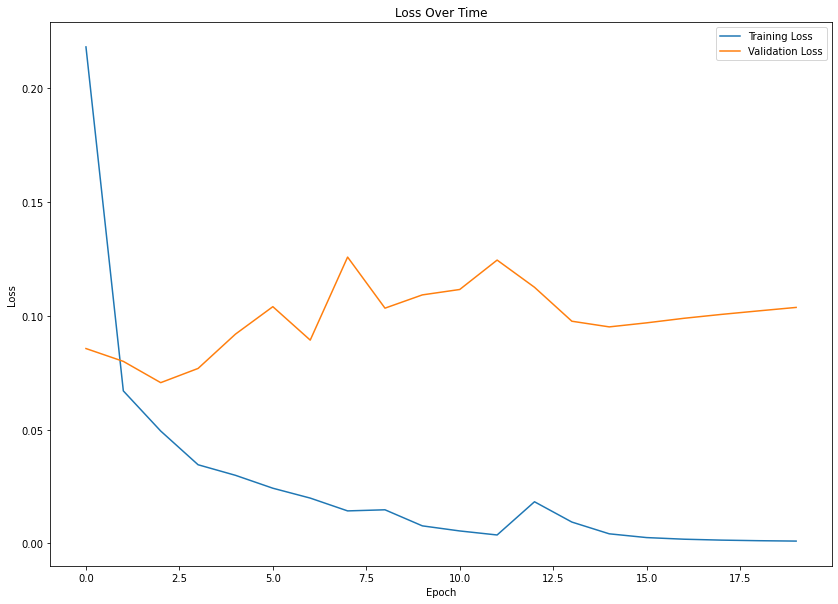

In [118]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [119]:
model.evaluate(X_test, y_test)

354/354 [==============================] - 0s 963us/step - loss: 0.0964 - accuracy: 0.9831


[0.09637043625116348, 0.9831361174583435]

In [120]:
predicted_vals = tf.argmax(model(X_test[0:128]), -1)
sum = 0
for i in range(128):
    #print(i)
    print(y_test.values[i], " > ", predicted_vals.numpy()[i])
    if(y_test.values[i] != predicted_vals[i].numpy()):
        sum += 1;
#print(y_test[0], " > ", predicted_vals[0].numpy())
print(sum)

2  >  2
0  >  0
2  >  2
2  >  2
1  >  1
1  >  1
2  >  2
0  >  0
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
1  >  1
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
0  >  0
2  >  2
1  >  1
2  >  2
0  >  2
0  >  0
2  >  2
1  >  1
2  >  2
1  >  1
2  >  2
0  >  2
0  >  0
1  >  1
0  >  0
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
1  >  1
1  >  1
1  >  1
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
1  >  4
2  >  2
0  >  0
2  >  2
0  >  0
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
1  >  1
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
0  >  0
2  >  2
2  >  2
1  >  1
1  >  1
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
2  >  2
2  >  2


In [ ]:
predicted_vals.numpy()[1]
y_test.values[1]